**Importing Data**

In [1]:
import pandas as pd
import numpy as np

space = pd.read_csv('neo.csv')
space.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [2]:
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [3]:
space.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


**No visible ouliers**

In [4]:
space['hazardous'] = space['hazardous'].replace([True,False],[1,0])
space['sentry_object'] = space['sentry_object'].replace([True,False],[1,0])

<AxesSubplot:>

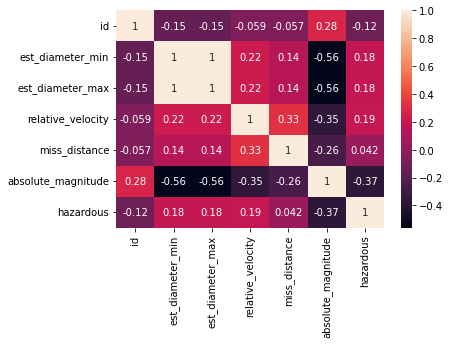

In [5]:
import seaborn as sns
sns.heatmap(space.corr(), annot = True)

In [6]:
features = ['est_diameter_min','est_diameter_max','relative_velocity','miss_distance','absolute_magnitude']
X = space.copy()[features]
X['hazardous'] = space['hazardous']

**Feature Scaling**

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for f in features:
   X[f] = scaler.fit_transform(X[f].values.reshape(-1,1))

In [8]:
#splitting data into train and test data for both x and y
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X[features],X['hazardous'])

**Applying Random Forest Classifier model**

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [10]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.91540798802237